In [1]:
import os
import sys

In [2]:
sys.executable

'/opt/jupyterhub/bin/python3'

In [3]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import math
import os, json, argparse, string, subprocess, re

In [4]:
import os

cmd = 'igblastn \
    -germline_db_V /usr/local/igblast/database/IGV \
    -germline_db_D /usr/local/igblast/database/IGHD \
    -germline_db_J /usr/local/igblast/database/IGJ \
    -auxiliary_data optional_file/human_gl.aux \
    -query SRR12749786.fa \
    -outfmt 19 \
    -num_threads 64 \
    -out SRR12749786.BLAST'
os.system(cmd)

0

In [6]:
df = pd.read_csv("SRR12749786.BLAST",sep="\t")

In [7]:
print(df)

               sequence_id                                           sequence  \
0            SRR12749786.1  CTAGGGCCCCTTACCTGACTCTCACCTGCCCCAACTCCAGGTACAA...   
1            SRR12749786.2  NCGTAACTGATCTGACTTTGTATGTAAATACAGAAAAANCTTNNNC...   
2            SRR12749786.3  NTTCCTTTACTTTTTGAATTTTTGGAGAATTCTGTTCCAACTCAGC...   
3            SRR12749786.4  ATGTGATGTTGGAGTAGGAGGGTTTATCTTGGTGACTTTGGGATGC...   
4            SRR12749786.5  TTGAGCTCAGGAAGGTTATGTCATCTATTGGCAATGACCTAGCCAA...   
...                    ...                                                ...   
116971  SRR12749786.116972  TCCGATCTTATGTCTGTTTCGTGGTGGGAAATATCCTATGTTTTCT...   
116972  SRR12749786.116973  TCTCGGGCAGAAGCTGGCAGTGGTGGGCCTGGCTTCACCTTCACTT...   
116973  SRR12749786.116974  GGCGAACTGGGCCTGCAGGATGAGAAGGTGCTGCGGGTTCCAGTTG...   
116974  SRR12749786.116975  GTGCTGAGCAGTGTCAATCCAGTCCCTGTTTACATCCCAAACCTCA...   
116975  SRR12749786.116976  GTGAAATTTTGTAGGTGAAAAGGTTTACTTTTCACCAGTCTGTTCT...   

                           

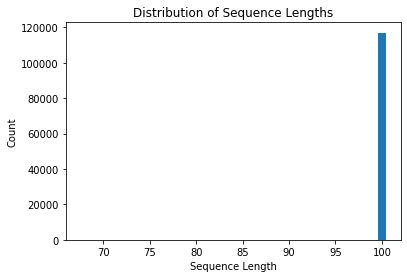

In [8]:
# add a new column with the length of the sequences 
df['seq_len'] = df['sequence'].apply(len)
seq_len_counts = df['seq_len'].value_counts()

#print(df[['sequence', 'seq_len']])
#print(seq_len_counts)

seq_len_counts = seq_len_counts.sort_index()

# Plot the distribution of sequence lengths
import matplotlib.pyplot as plt
plt.bar(seq_len_counts.index, seq_len_counts.values)
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('Distribution of Sequence Lengths')
plt.show()
plt.close()

In [9]:
list(df)

['sequence_id',
 'sequence',
 'sequence_aa',
 'locus',
 'stop_codon',
 'vj_in_frame',
 'v_frameshift',
 'productive',
 'rev_comp',
 'complete_vdj',
 'd_frame',
 'v_call',
 'd_call',
 'j_call',
 'sequence_alignment',
 'germline_alignment',
 'sequence_alignment_aa',
 'germline_alignment_aa',
 'v_alignment_start',
 'v_alignment_end',
 'd_alignment_start',
 'd_alignment_end',
 'j_alignment_start',
 'j_alignment_end',
 'v_sequence_alignment',
 'v_sequence_alignment_aa',
 'v_germline_alignment',
 'v_germline_alignment_aa',
 'd_sequence_alignment',
 'd_sequence_alignment_aa',
 'd_germline_alignment',
 'd_germline_alignment_aa',
 'j_sequence_alignment',
 'j_sequence_alignment_aa',
 'j_germline_alignment',
 'j_germline_alignment_aa',
 'fwr1',
 'fwr1_aa',
 'cdr1',
 'cdr1_aa',
 'fwr2',
 'fwr2_aa',
 'cdr2',
 'cdr2_aa',
 'fwr3',
 'fwr3_aa',
 'fwr4',
 'fwr4_aa',
 'cdr3',
 'cdr3_aa',
 'junction',
 'junction_length',
 'junction_aa',
 'junction_aa_length',
 'v_score',
 'd_score',
 'j_score',
 'v_cigar'

In [10]:
df['sequence']

0         CTAGGGCCCCTTACCTGACTCTCACCTGCCCCAACTCCAGGTACAA...
1         NCGTAACTGATCTGACTTTGTATGTAAATACAGAAAAANCTTNNNC...
2         NTTCCTTTACTTTTTGAATTTTTGGAGAATTCTGTTCCAACTCAGC...
3         ATGTGATGTTGGAGTAGGAGGGTTTATCTTGGTGACTTTGGGATGC...
4         TTGAGCTCAGGAAGGTTATGTCATCTATTGGCAATGACCTAGCCAA...
                                ...                        
116971    TCCGATCTTATGTCTGTTTCGTGGTGGGAAATATCCTATGTTTTCT...
116972    TCTCGGGCAGAAGCTGGCAGTGGTGGGCCTGGCTTCACCTTCACTT...
116973    GGCGAACTGGGCCTGCAGGATGAGAAGGTGCTGCGGGTTCCAGTTG...
116974    GTGCTGAGCAGTGTCAATCCAGTCCCTGTTTACATCCCAAACCTCA...
116975    GTGAAATTTTGTAGGTGAAAAGGTTTACTTTTCACCAGTCTGTTCT...
Name: sequence, Length: 116976, dtype: object

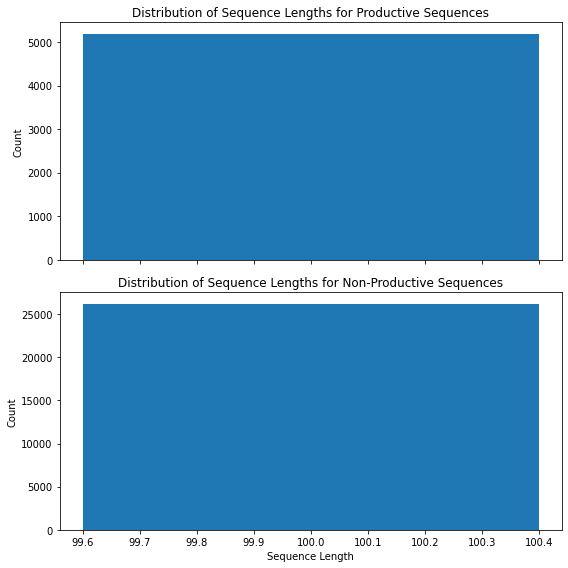

In [11]:
df['seq_len'] = df['sequence'].apply(len)

# Filter the data where 'productive' is 'T'
productive_df = df[df['productive'] == 'T']

# Filter the data where 'productive' is 'F'
non_productive_df = df[df['productive'] == 'F']

# Count the occurrences of each sequence length for productive and non-productive sequences
productive_seq_len_counts = productive_df['seq_len'].value_counts().sort_index()
non_productive_seq_len_counts = non_productive_df['seq_len'].value_counts().sort_index()

# Create a 2x1 subplot layout
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Plot the distribution of sequence lengths for productive sequences
axes[0].bar(productive_seq_len_counts.index, productive_seq_len_counts.values)
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Sequence Lengths for Productive Sequences')

# Plot the distribution of sequence lengths for non-productive sequences
axes[1].bar(non_productive_seq_len_counts.index, non_productive_seq_len_counts.values)
axes[1].set_xlabel('Sequence Length')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Sequence Lengths for Non-Productive Sequences')

plt.tight_layout()
plt.show()
plt.close()

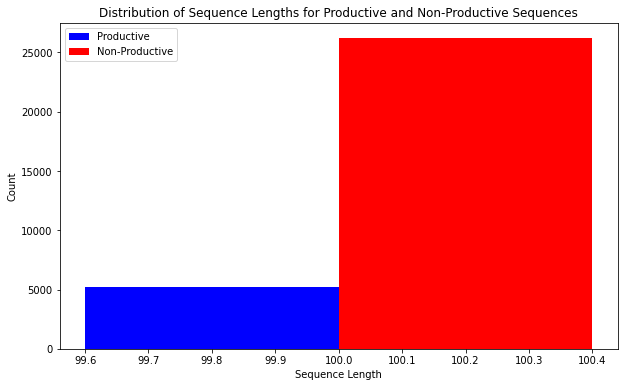

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame with columns 'sequence', 'productive', and 'seq_len'

# Create a new column 'seq_len' that contains the length of each sequence
df['seq_len'] = df['sequence'].apply(len)

# Filter the data where 'productive' is 'T'
productive_df = df[df['productive'] == 'T']

# Filter the data where 'productive' is 'F'
non_productive_df = df[df['productive'] == 'F']

# Count the occurrences of each sequence length for productive and non-productive sequences
productive_seq_len_counts = productive_df['seq_len'].value_counts().sort_index()
non_productive_seq_len_counts = non_productive_df['seq_len'].value_counts().sort_index()

# Create a single plot with two bars side by side
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution of sequence lengths for productive sequences (in blue)
ax.bar(productive_seq_len_counts.index - 0.2, productive_seq_len_counts.values, width=0.4, color='blue', label='Productive')

# Plot the distribution of sequence lengths for non-productive sequences (in red)
ax.bar(non_productive_seq_len_counts.index + 0.2, non_productive_seq_len_counts.values, width=0.4, color='red', label='Non-Productive')

ax.set_xlabel('Sequence Length')
ax.set_ylabel('Count')
ax.set_title('Distribution of Sequence Lengths for Productive and Non-Productive Sequences')
ax.legend()

plt.show()
plt.close()
